In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load dataset

In [39]:
df = pd.read_csv('data.csv')
df.head()

,Make,Model,Year,Engine Fuel Type,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,premium unleaded (required),335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,premium unleaded (required),300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,premium unleaded (required),230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Check datatypes of columns

In [40]:
df.dtypes

,0
Make,object
Model,object
Year,int64
Engine Fuel Type,object
Engine HP,float64
Engine Cylinders,float64
Transmission Type,object
Driven_Wheels,object
Number of Doors,float64
Market Category,object


# Drop irrelevant columns

In [41]:
pd.unique(df['Engine Fuel Type']) # dataset=10000(say) but 3000 have 'diesel' & 4000 have 'electric',but different price for same Engine Fuel Type

array(['premium unleaded (required)', 'regular unleaded',
       'premium unleaded (recommended)', 'flex-fuel (unleaded/E85)',
       'diesel', 'electric',
       'flex-fuel (premium unleaded recommended/E85)', 'natural gas',
       'flex-fuel (premium unleaded required/E85)',
       'flex-fuel (unleaded/natural gas)', nan], dtype=object)

In [42]:
df = df.drop(['Engine Fuel Type'],axis=1)
df.head()

,Make,Model,Year,Engine HP,Engine Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Rename columns for further convenience

In [43]:
df = df.rename(columns={"Engine HP": "HP","Engine Cylinders": "Cylinders"})
df.head()

,Make,Model,Year,HP,Cylinders,Transmission Type,Driven_Wheels,Number of Doors,Market Category,Vehicle Size,Vehicle Style,highway MPG,city mpg,Popularity,MSRP
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,rear wheel drive,2.0,"Factory Tuner,Luxury,High-Performance",Compact,Coupe,26,19,3916,46135
1,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Convertible,28,19,3916,40650
2,BMW,1 Series,2011,300.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,High-Performance",Compact,Coupe,28,20,3916,36350
3,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,"Luxury,Performance",Compact,Coupe,28,18,3916,29450
4,BMW,1 Series,2011,230.0,6.0,MANUAL,rear wheel drive,2.0,Luxury,Compact,Convertible,28,18,3916,34500


# Dropping duplicate rows

In [44]:
df.shape

(11914, 15)

In [45]:
duplicate_rows_df = df[df.duplicated()]
duplicate_rows_df.shape

(715, 15)

In [46]:
print(df.count())
df = df.drop_duplicates()
print(df.count())

Make                 11914
Model                11914
Year                 11914
HP                   11845
Cylinders            11884
Transmission Type    11914
Driven_Wheels        11914
Number of Doors      11908
Market Category       8172
Vehicle Size         11914
Vehicle Style        11914
highway MPG          11914
city mpg             11914
Popularity           11914
MSRP                 11914
dtype: int64
Make                 11199
Model                11199
Year                 11199
HP                   11130
Cylinders            11169
Transmission Type    11199
Driven_Wheels        11199
Number of Doors      11193
Market Category       7823
Vehicle Size         11199
Vehicle Style        11199
highway MPG          11199
city mpg             11199
Popularity           11199
MSRP                 11199
dtype: int64


# Drop missing values or null values

In [48]:
print(df.isnull().sum())
df = df.dropna()
df.count()

Make                    0
Model                   0
Year                    0
HP                     69
Cylinders              30
Transmission Type       0
Driven_Wheels           0
Number of Doors         6
Market Category      3376
Vehicle Size            0
Vehicle Style           0
highway MPG             0
city mpg                0
Popularity              0
MSRP                    0
dtype: int64


,0
Make,7735
Model,7735
Year,7735
HP,7735
Cylinders,7735
Transmission Type,7735
Driven_Wheels,7735
Number of Doors,7735
Market Category,7735
Vehicle Size,7735


# Outliers

<Axes: xlabel='HP'>

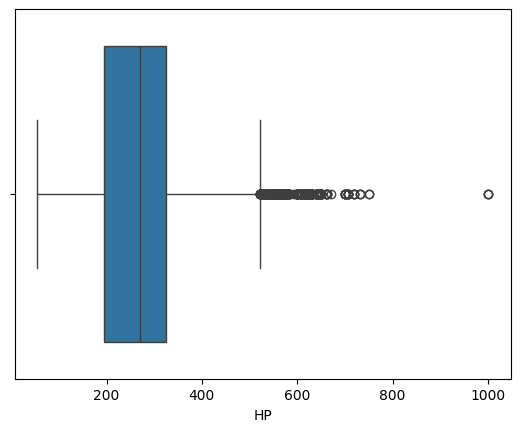

In [52]:
sns.boxplot(x=df['HP'])

# Plot different features (one vs other)

<Axes: xlabel='Make'>

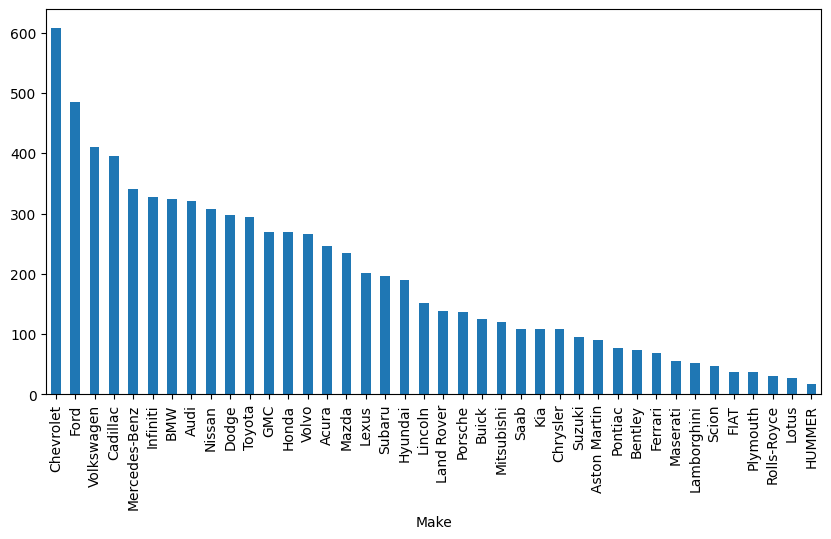

In [54]:
df.Make.value_counts().nlargest(40).plot(kind='bar',figsize=(10,5))

<Axes: xlabel='Year', ylabel='Count'>

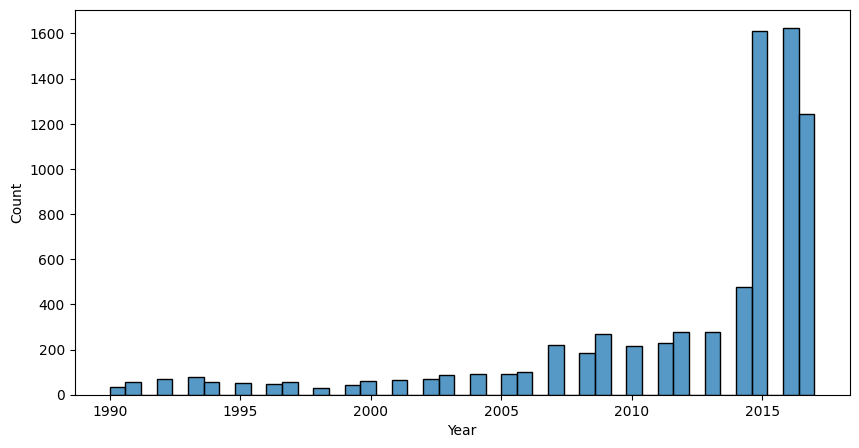

In [55]:
plt.figure(figsize=(10,5))
sns.histplot(df['Year'])

<Axes: xlabel='HP', ylabel='MSRP'>

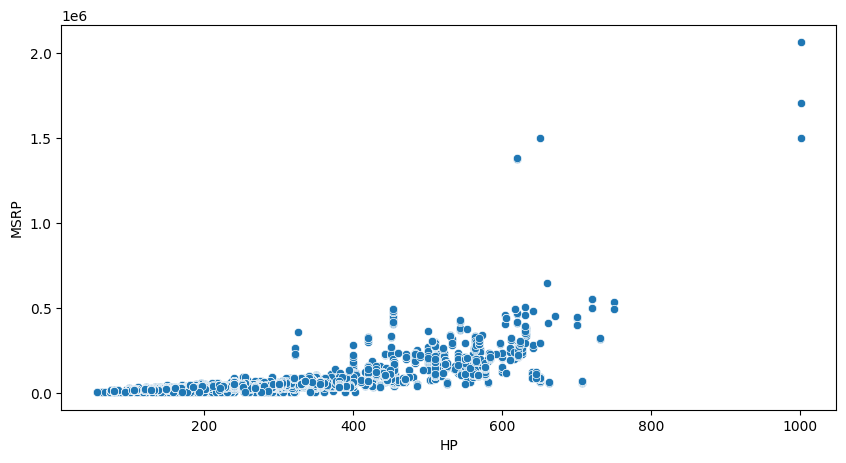

In [57]:
plt.figure(figsize = (10,5))
sns.scatterplot(x = df['HP'],y = df['MSRP'])

<Axes: xlabel='HP', ylabel='MSRP'>

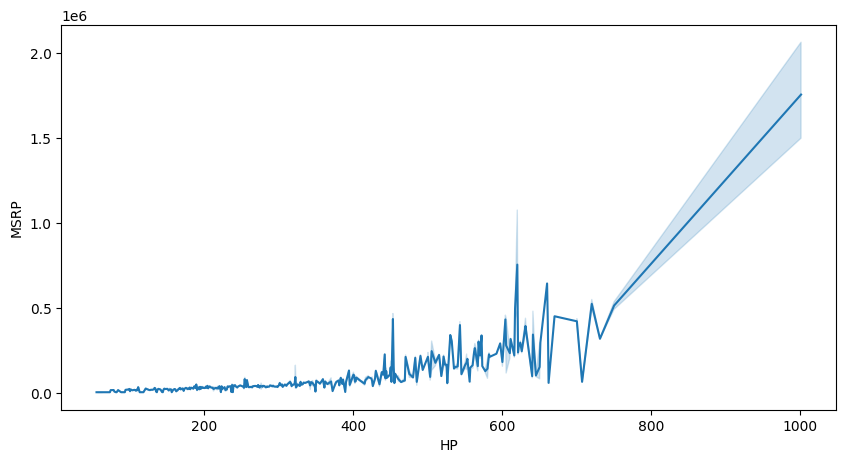

In [58]:
plt.figure(figsize = (10,5))
sns.lineplot(x = df['HP'],y = df['MSRP'])

<Axes: >

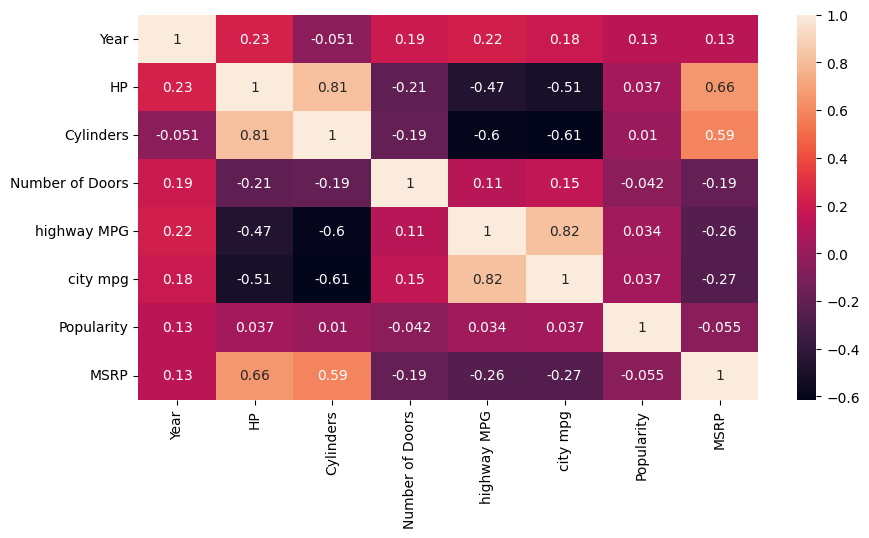

In [68]:
plt.figure(figsize = (10,5))
c = df.corr(numeric_only=True)
sns.heatmap(c,annot=True)